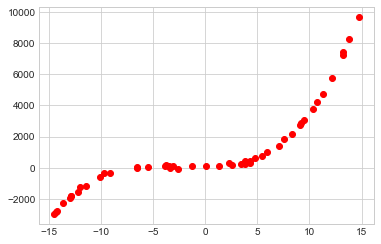

In [65]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

### We will generate polynomial features up to specified degree.So for each value of x a row is created as x ** 0 + x ** 1 + x ** 2 + x ** 3 ...... until the psecified degree here it is 2. So it stops at x ** 2.

In [ ]:
# Fit polynomial of degree 2 
degree = 2

X_poly = np.column_stack([x ** i for i in range(degree + 1)])

#print(x[:5])
#print(X_poly[:5])

### We will calculate  the co efficients from noraml equation W^ = (X^t . X)-1.(X^t).(Y)

In [ ]:
#coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
coefficients = np.dot(np.dot(np.linalg.inv(np.dot(X_poly.T, X_poly)), X_poly.T), y)

#print("x_ploy",X_poly.shape)
#print("coefficients",coefficients.shape)

### Next we will create a range of values for x to generate a smooth curve and form the design for the polynomial features of the generated x_values and calculates the predicted values for the polynomial curve using the obtained coefficients.

In [ ]:
# Generate values for the polynomial curve
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)
#print(x_values[:5])

# Initialize an array for polynomial features
X_values_poly = np.zeros((len(x_values), degree + 1))
#print(X_values_poly.shape)

# Generate polynomial features for each degree
for i in range(degree + 1):
    X_values_poly[:, i] = x_values[:, 0] ** i
#print(X_values_poly[:5])


# Calculate the predicted values for the polynomial curve
y_poly = np.dot(X_values_poly, coefficients)


### we will plot the graph for generated x,y data and predicted y_poly values along with x_values.

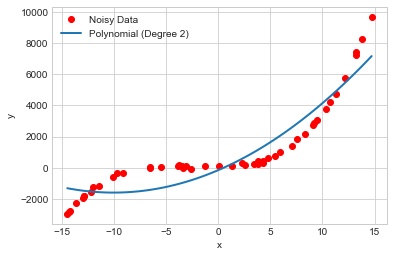

In [67]:
# Plot the noisy data
plt.plot(x, y, 'ro', label='Noisy Data')

# Plot the polynomial curve
plt.plot(x_values, y_poly, label=f'Polynomial (Degree {degree})', linewidth=2)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

### We will noe find the Root mean square error for the predicted y_polynomial values and generated y values.

In [68]:


# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(np.mean((y_poly[:number_of_samples] - y) ** 2))
print(f'Root Mean Square Error (RMSE): {rmse}')



Root Mean Square Error (RMSE): 3539.087842399598


## Now we will put everything into one fuction Polyfit, pass degree,number_of_sample and noise_scale and try to make an observation.

__________________________________________________
For Degree : 8, Sample size : 100 and Noise of value :10
Root Mean Square Error (RMSE): 3174.7483413926825


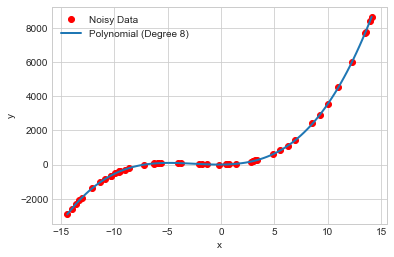

__________________________________________________
__________________________________________________
For Degree : 7, Sample size : 200 and Noise of value :20
Root Mean Square Error (RMSE): 3173.7591316485755


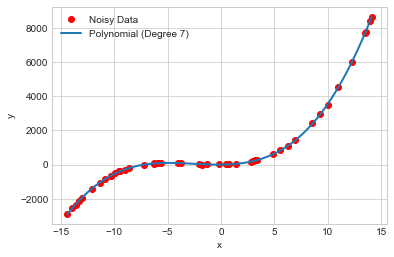

__________________________________________________
__________________________________________________
For Degree : 6, Sample size : 300 and Noise of value :30
Root Mean Square Error (RMSE): 3171.8042468332374


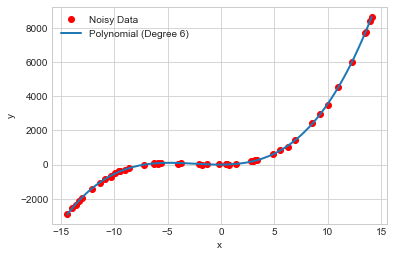

__________________________________________________
__________________________________________________
For Degree : 5, Sample size : 400 and Noise of value :40
Root Mean Square Error (RMSE): 3170.7386763535023


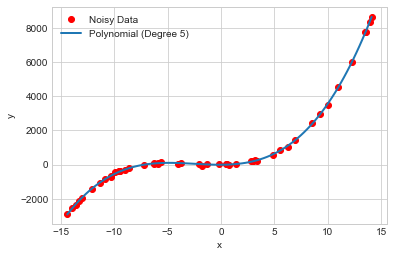

__________________________________________________
__________________________________________________
For Degree : 4, Sample size : 500 and Noise of value :50
Root Mean Square Error (RMSE): 3170.375303171538


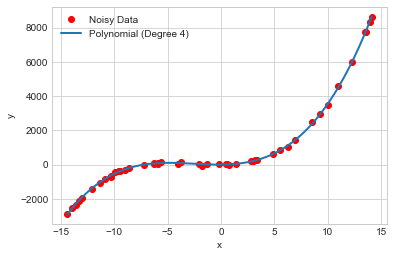

__________________________________________________
__________________________________________________
For Degree : 3, Sample size : 600 and Noise of value :60
Root Mean Square Error (RMSE): 3168.6168059374627


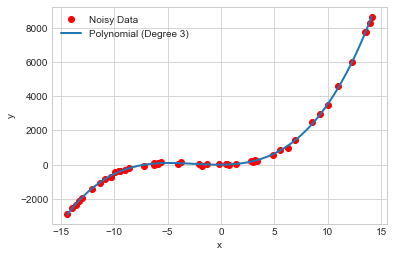

__________________________________________________
__________________________________________________
For Degree : 2, Sample size : 700 and Noise of value :70
Root Mean Square Error (RMSE): 3162.4794165287135


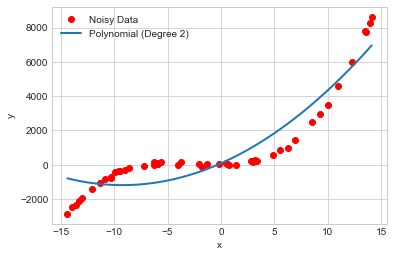

__________________________________________________
__________________________________________________
For Degree : 1, Sample size : 800 and Noise of value :80
Root Mean Square Error (RMSE): 3332.2274748671953


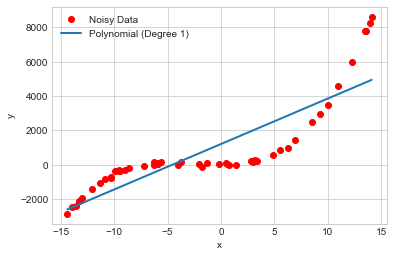

__________________________________________________


In [75]:
import matplotlib.pyplot as plt
import numpy as np


def polyfit(degree,number_of_sample,noise_scale):
    
    # Set random seed for reproducibility
    np.random.seed(42)

    plt.style.use('seaborn-whitegrid')

    # Generate noisy data
    x = 30 * (np.random.rand(number_of_samples, 1) - 0.5)
    y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale * np.random.randn(number_of_samples, 1)

    
    X_poly = np.column_stack([x ** i for i in range(degree + 1)])
    
    #print(X_poly[:5])
    #print(x[:5])
    #coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    
    coefficients = np.dot(np.dot(np.linalg.inv(np.dot(X_poly.T, X_poly)), X_poly.T), y)
    
    #print("x_ploy",X_poly.shape)
    #print("coefficients",coefficients.shape)

    # Generate values for the polynomial curve
    x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    
    #print(x_values[:5])
    
    # Initialize an array for polynomial features
    X_values_poly = np.zeros((len(x_values), degree + 1))
    #print(X_values_poly.shape)
    
    # Generate polynomial features for each degree
    for i in range(degree + 1):
        X_values_poly[:, i] = x_values[:, 0] ** i
    #print(X_values_poly[:5])
    
    # Calculate the predicted values for the polynomial curve
    y_poly = np.dot(X_values_poly, coefficients)


    # Plot the noisy data
    plt.plot(x, y, 'ro', label='Noisy Data')

    # Plot the polynomial curve
    plt.plot(x_values, y_poly, label=f'Polynomial (Degree {degree})', linewidth=2)

    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    # Show the plot
    #plt.show()

    # Calculate Root Mean Square Error (RMSE)
    rmse = np.sqrt(np.mean((y_poly[:number_of_samples] - y) ** 2))
    
    return rmse,plt


#degree,number_of_sample dictionary
#degree_sample={1:100,2:200,3:300,4:400,5:500,6:600,7:700,8:800}

degree_sample={8:100,7:200,6:300,5:400,4:500,3:600,2:700,1:800}

#increasing noise 
noise=[10,20,30,40,50,60,70,80]

#decreasing noise 
#noise=[80,70,60,50,40,30,20,10]

for key_value,noise in zip(degree_sample.items(),noise):
    
    print("_"*50)
    Rmse,plt_obj=polyfit(key_value[0],key_value[1],noise)
    print(f"For Degree : {key_value[0]}, Sample size : {key_value[1]} and Noise of value :{noise}")
    print(f'Root Mean Square Error (RMSE): {Rmse}')
    plt_obj.show()
    print("_"*50)


# Conclusion.

For Degree : 2, Sample size : 200 and Noise of value :20
Root Mean Square Error (RMSE): 3166.770915036324
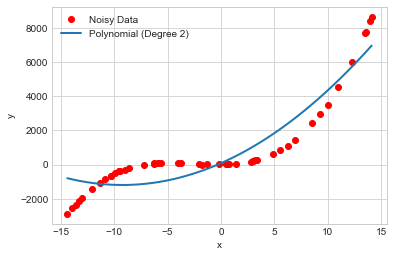

For Degree : 2, Sample size : 200 and Noise of value :70
Root Mean Square Error (RMSE): 3162.4794165287135
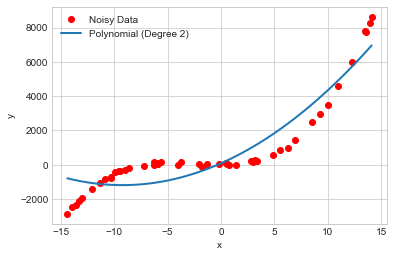


## Observation 1
#### In both the senarios where noise is 70 and 20, among all other poly fits we got the quadractic polynomial as good fit as the RMSE is least among all the polynomial fits.


For Degree : 2, Sample size : 700 and Noise of value :70
Root Mean Square Error (RMSE): 3162.4794165287135

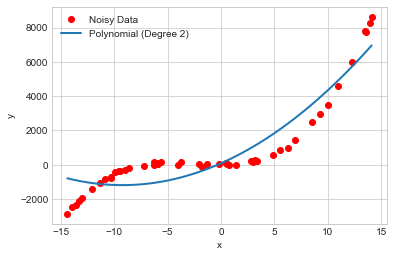

## Observations 2

#### If we increase sample size and increase noise as well, then the quadratic fucntions seems to be a good fit among others.

